In [ ]:
pip install numpy

In [ ]:
pip install scipy

In [ ]:
pip install scikit-learn

In [ ]:
#test.py
from sklearn import tree
X=[[0,0],[2,2]]
y=[0.5,2.5]
clf=tree.DecisionTreeRegressor()
clf=clf.fit(X,y)
clf.predict([[1,1]])

array([0.5])

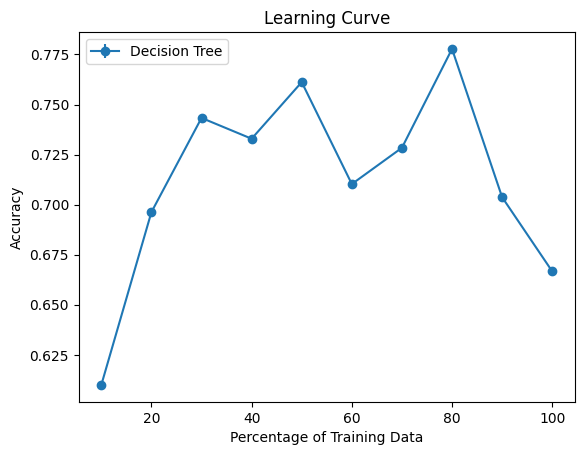

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def evaluatePerformance():
    filename = '/content/SPECTF.dat'
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = np.array([data[:, 0]]).T
    n, d = X.shape

    # shuffle the data
    idx = np.arange(n)
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Initialize arrays to store learning curve data
    percentages = np.arange(0.1, 1.1, 0.1)
    mean_accuracies = np.zeros_like(percentages)
    std_accuracies = np.zeros_like(percentages)

    for i, percent in enumerate(percentages):
        # Ensure a minimum test_size to avoid ValueError
        min_test_size = 0.01
        test_size = max(min_test_size, 1 - percent)

        # Split the data based on the percentage
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=42)

        # Train the decision tree
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(Xtrain, ytrain)

        # Output predictions on the remaining data
        y_pred = clf.predict(Xtest)

        # Compute the testing accuracy of the model
        accuracy = accuracy_score(ytest, y_pred)

        # Update learning curve data
        mean_accuracies[i] = np.mean(accuracy)
        std_accuracies[i] = np.std(accuracy)

    # Plot learning curve
    plt.errorbar(percentages * 100, mean_accuracies, yerr=std_accuracies, fmt='-o', label='Decision Tree')
    plt.xlabel('Percentage of Training Data')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    evaluatePerformance()
